In [1]:
"""
The purpose of this Jupyter notebook is to investigate the distribution
of the IQM-normalized and PPI-refined intensity values as well as of the
unnormalized intensity values.
"""

'\nThe purpose of this Jupyter notebook is to investigate the distribution\nof the IQM-normalized and PPI-refined intensity values as well as of the\nunnormalized intensity values.\n'

In [2]:
import os

import pandas as pd
from matplotlib import pyplot as plt
import matplotlib

In [3]:
# Load the different intensity values (IQM-normalized and PPI-refined,
# unnormalized but PPI-refined and unnormalized and unrefined)
modes_list = ["max", "mean", "median", "sum"]

ints_IQM_normalized_PPI_refined_list = []

# Gather IQM-normalized PPI-refined intensities
for mode in modes_list:
    current_tsv_path = (
        "../refined_intensities_and_related_data/IQM-normalized_"
        f"intensities_{mode}_refined.tsv"
    )
    current_df = pd.read_csv(
        current_tsv_path,
        sep="\t"
    )
    ints_IQM_normalized_PPI_refined_list.append(current_df)


ints_unnormalized_PPI_refined_list = []

# Gather unnormalized PPI-refined intensities
for mode in modes_list:
    current_tsv_path = (
        "../refined_intensities_and_related_data/unnorm_intensities_"
        f"{mode}_refined.tsv"
    )
    current_df = pd.read_csv(
        current_tsv_path,
        sep="\t"
    )
    ints_unnormalized_PPI_refined_list.append(current_df)

# Also load the unnormalized and unrefined intensities
ints_unnormalized_unrefined_path = (
    "../refined_intensities_and_related_data/unnorm_intensities_"
    "min-max_normalized.tsv"
)

ints_unnormalized_unrefined_df = pd.read_csv(
    ints_unnormalized_unrefined_path,
    sep="\t"
)

# Lastly, load the IQM-normalized and min-max normalized intensities
ints_IQM_normalized_min_max_normalized_path = (
    "/Users/jacobanter/Documents/Code/VACV_screen/Processing_Dharmacon_"
    "pooled_genome_1_and_2_subset/refined_intensities_and_related_data/"
    "IQM-normalized_intensities_min-max_normalized.tsv"
)

ints_IQM_normalized_min_max_normalized_df = pd.read_csv(
    ints_IQM_normalized_min_max_normalized_path,
    sep="\t"
)

In [4]:
# Generate histograms depicting the distribution of the intensities
# To this end, a directory has to be created first
histograms_dir = "intensity_distribution_histograms"

if not os.path.exists(histograms_dir):
    os.makedirs(histograms_dir)

In [5]:
# For the sake of convenience, define a function generating histogram
# plots
def plot_intensity_distribution(
        intensity_df, feature_names, names_in_titles, save_dir,
        file_description
):
    """
    Plots the distribution of intensity values as a histogram.

    To be more precise, the visualization of the intensity distribution
    is performed for the features listed in `feature_names`.

    Parameters
    ----------
    intensity_df: Pandas DataFrame
        A Pandas DataFrame storing the intensity values the distribution
        of which is to be visualized.
    feature_names: list
        A list containing the feature names for which the visualization
        is to be performed.
    names_in_titles: list
        A list containing the feature descriptions to appear in the plot
        titles.
    save_dir: str
        A string denoting the directory to store the plot in.
    file_description: str
        A description of the plots appearing in the image file name.

    Returns
    -------
    None
    """

    # Extract the features from the DataFrame
    # They are extracted as Pandas Serieses
    feature_list = []

    for feature_name in feature_names:
        feature_list.append(
            intensity_df[feature_name]
        )
    
    fig, axs = plt.subplots(1, len(feature_list))

    # Generate a histogram for each feature listed in `feature_names`
    for feature, ax, description in zip(feature_list, axs, names_in_titles):
        ax.hist(
            feature,
            bins=30,
            range=(0, 1)
        )
        ax.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ","))
        )
        ax.set_xlabel("Intensity")
        ax.set_ylabel("Count")
        ax.set_title(
            f"Distribution\n{description} intensities"
        )

    plt.tight_layout()

    fig.savefig(
        os.path.join(
            save_dir,
            f"intensity_distribution_{file_description}.png"
        ),
        dpi=300
    )

In [6]:
feature_names_unnormalized = [
    "dIntensity_cPathogen_eMean_oVoronoiCells",
    "dIntensity_cLatePathogen_eMean_oVoronoiCells"
]

feature_names_normalized = [
    "dIntensity_cPathogen_eMean_oVoronoiCells_nZScore",
    "dIntensity_cLatePathogen_eMean_oVoronoiCells_nZScore"
]

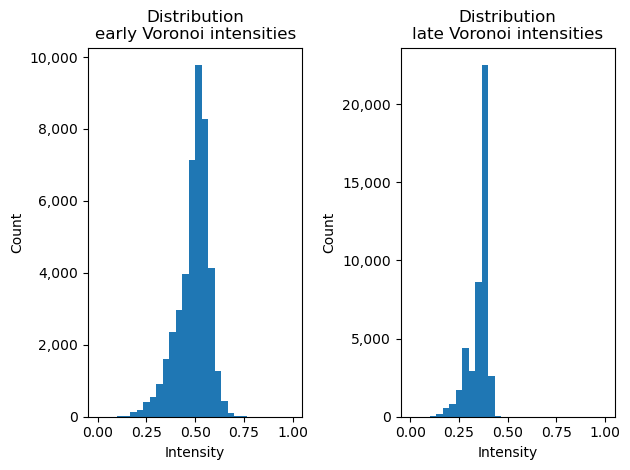

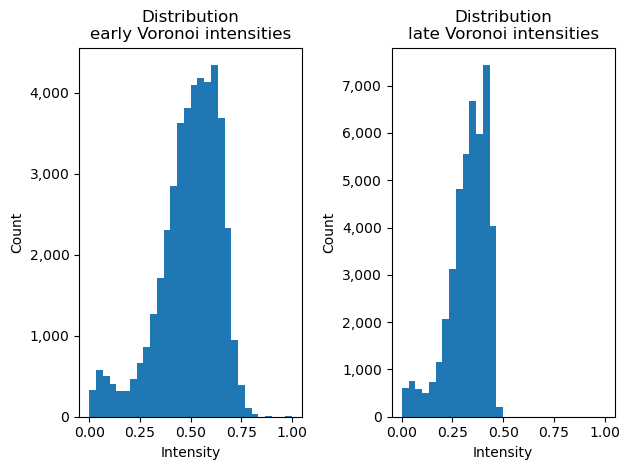

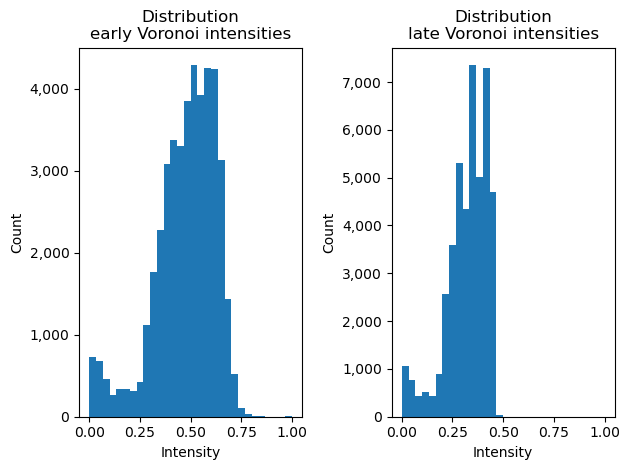

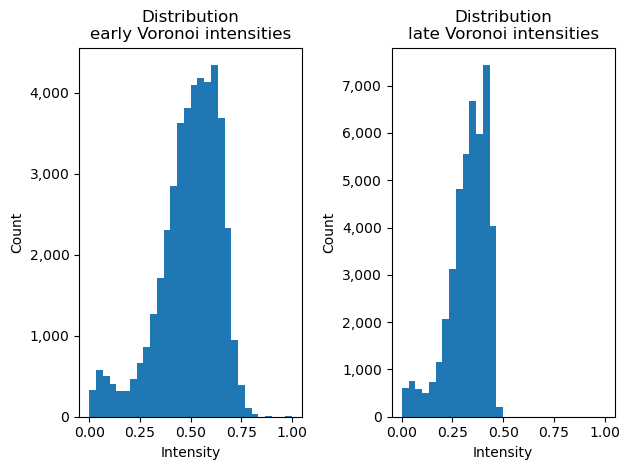

In [34]:
# Generate histograms for IQM-normalized PPI-refined intensities
for mode, ints_df in zip(modes_list, ints_IQM_normalized_PPI_refined_list):
    plot_intensity_distribution(
        ints_df,
        feature_names_normalized,
        ["early Voronoi", "late Voronoi"],
        histograms_dir,
        f"IQM-normalized_{mode}-refined"
    )

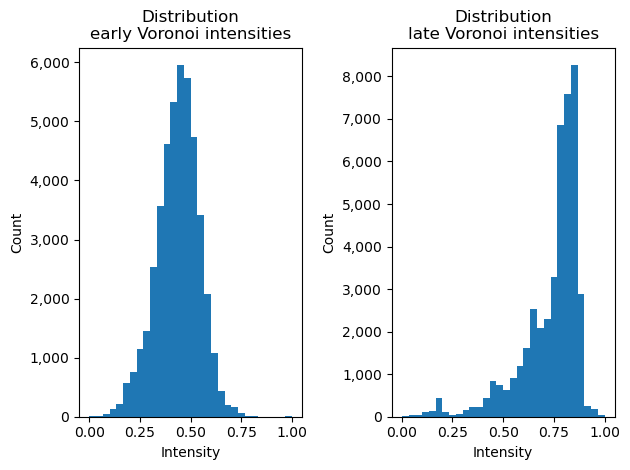

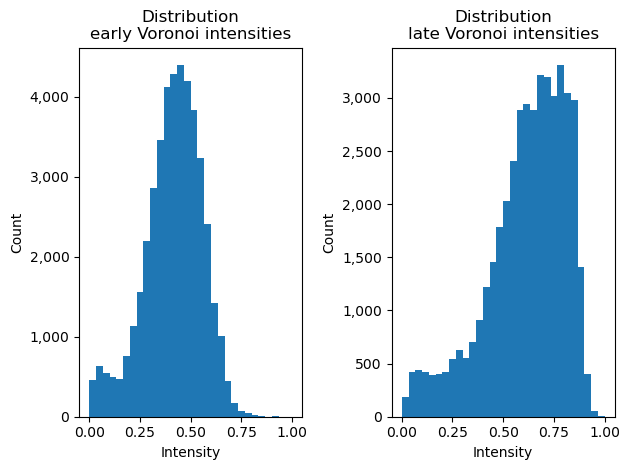

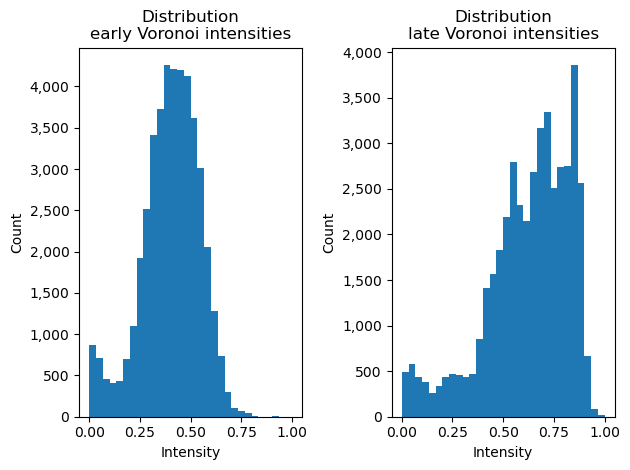

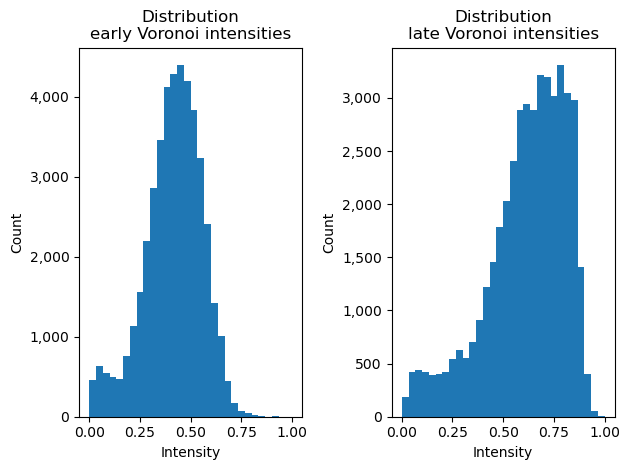

In [35]:
# Generate histograms for unnormalized PPI-refined intensities
for mode, ints_df in zip(modes_list, ints_unnormalized_PPI_refined_list):
    plot_intensity_distribution(
        ints_df,
        feature_names_unnormalized,
        ["early Voronoi", "late Voronoi"],
        histograms_dir,
        f"unnormalized_{mode}-refined"
    )

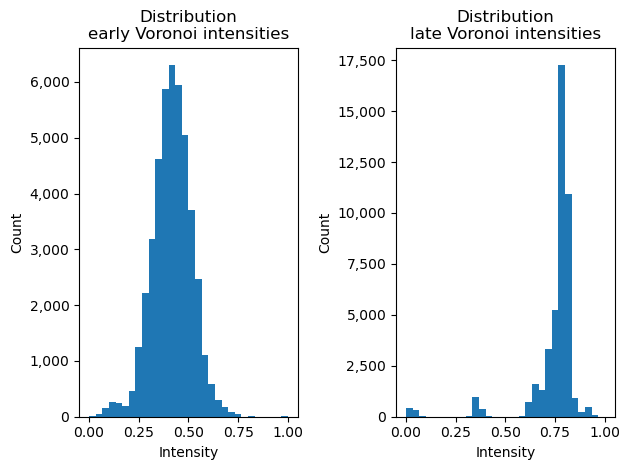

In [36]:
# Generate histograms for unnormalized and unrefined intensities
plot_intensity_distribution(
    ints_unnormalized_unrefined_df,
    feature_names_unnormalized,
    ["early Voronoi", "late Voronoi"],
    histograms_dir,
    "unnormalized_unrefined"
)

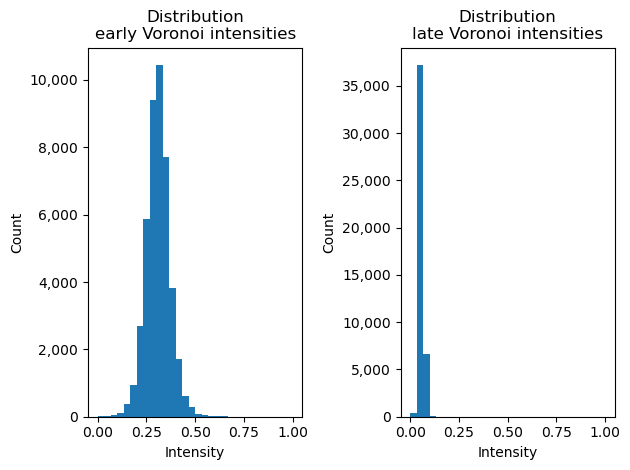

In [7]:
# Generate histograms for IQM-normalized and min-max normalized
# intensities
plot_intensity_distribution(
    ints_IQM_normalized_min_max_normalized_df,
    feature_names_normalized,
    ["early Voronoi", "late Voronoi"],
    histograms_dir,
    "IQM-normalized_min-max_normalized"
)